<a href="https://colab.research.google.com/github/tarunpanda001/Time_Series_Forecasting/blob/main/Mobile_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,6)

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 37.5MB/s]


In [ ]:
mobile_sales = pd.read_excel("/content/mobilesales.xlsx")

In [ ]:
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
mobile_sales.shape

(217, 2)

In [ ]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [ ]:
mobile_sales.isna().sum()

,0
DATE,0
Sales,19


In [ ]:
mobile_sales[mobile_sales["Sales"].isna()]

,DATE,Sales
14,2002-03-01,NaN
15,2002-04-01,NaN
16,2002-05-01,NaN
34,2003-11-01,NaN
57,2005-10-01,NaN
75,2007-04-01,NaN
98,2009-03-01,NaN
120,2011-01-01,NaN
125,2011-06-01,NaN
136,2012-05-01,NaN


In [ ]:
mobile_sales.set_index("DATE",inplace = True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


<Axes: xlabel='DATE'>

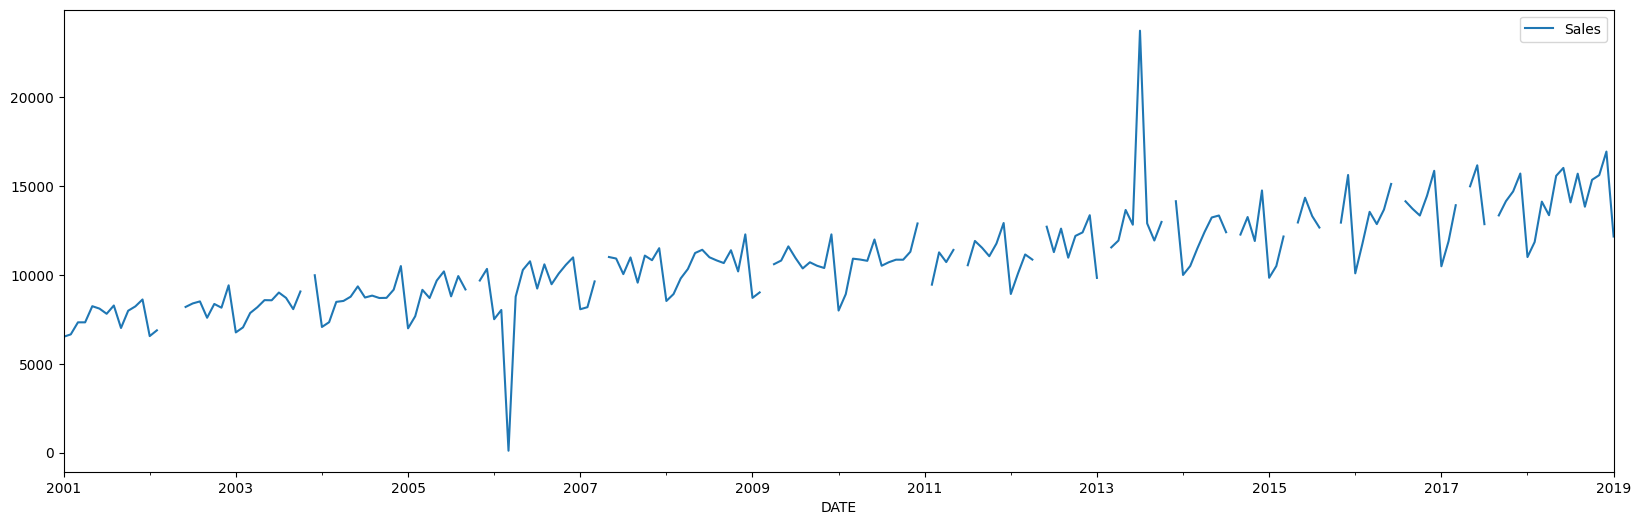

In [ ]:
mobile_sales.plot()

## Handling Null Values with Interpolate

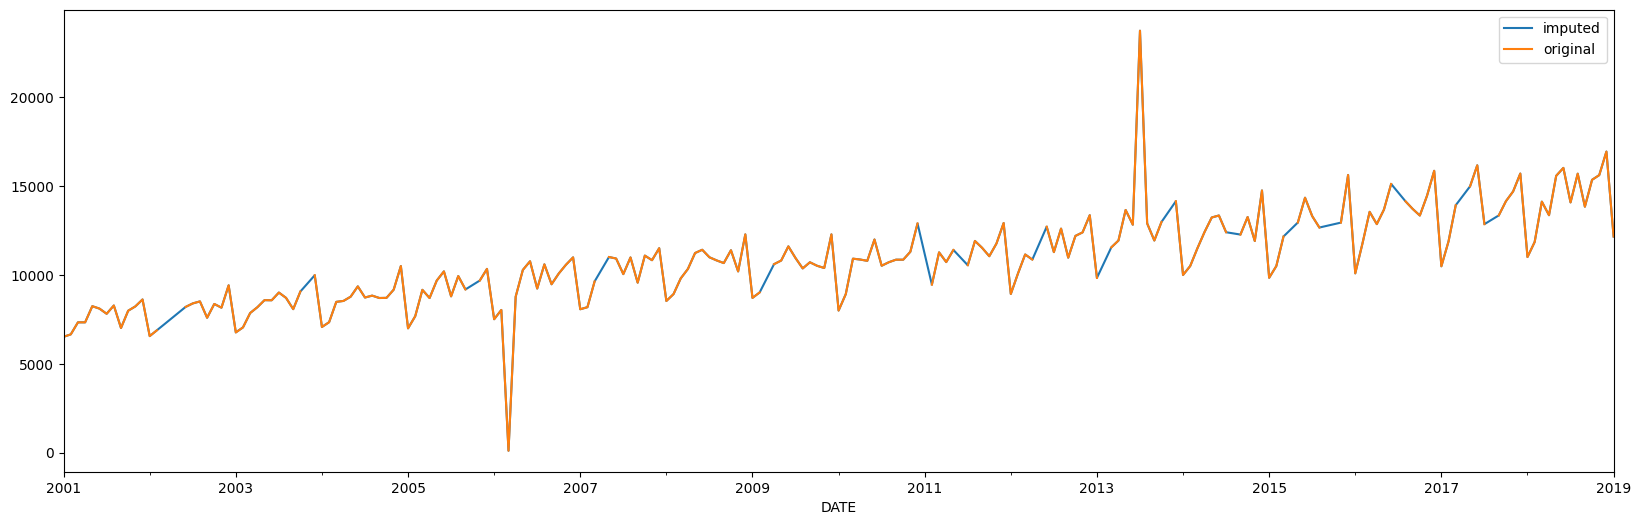

In [ ]:
mobile_sales.Sales.interpolate(method="linear").plot(label="imputed")
mobile_sales.Sales.plot(label="original")
plt.legend()

In [ ]:
mobile_sales.Sales=mobile_sales.Sales.interpolate(method = "linear")

## Dealing with anomalies

In [ ]:
mobile_sales.Sales.quantile(0.95)

np.float64(15164.599999999997)

In [ ]:
mobile_sales.Sales.quantile(0.05)

np.float64(7307.8)

<Axes: xlabel='DATE'>

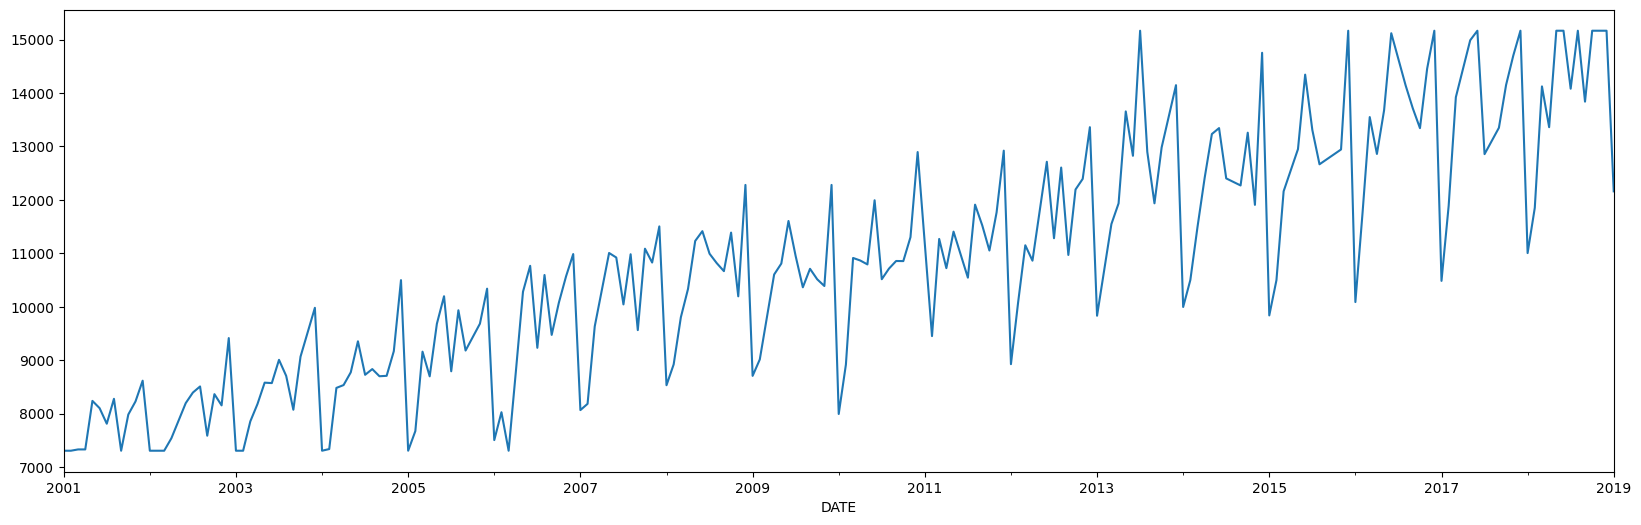

In [ ]:
mobile_sales.Sales.clip(upper = mobile_sales.Sales.quantile(0.95),lower=mobile_sales.Sales.quantile(0.05)).plot()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95),lower=mobile_sales.Sales.quantile(0.05))

In [ ]:
mobile_sales.Sales

,Sales
DATE,
2001-01-01,7307.8
2001-02-01,7307.8
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15164.6
2018-11-01,15164.6


## Moving Averages

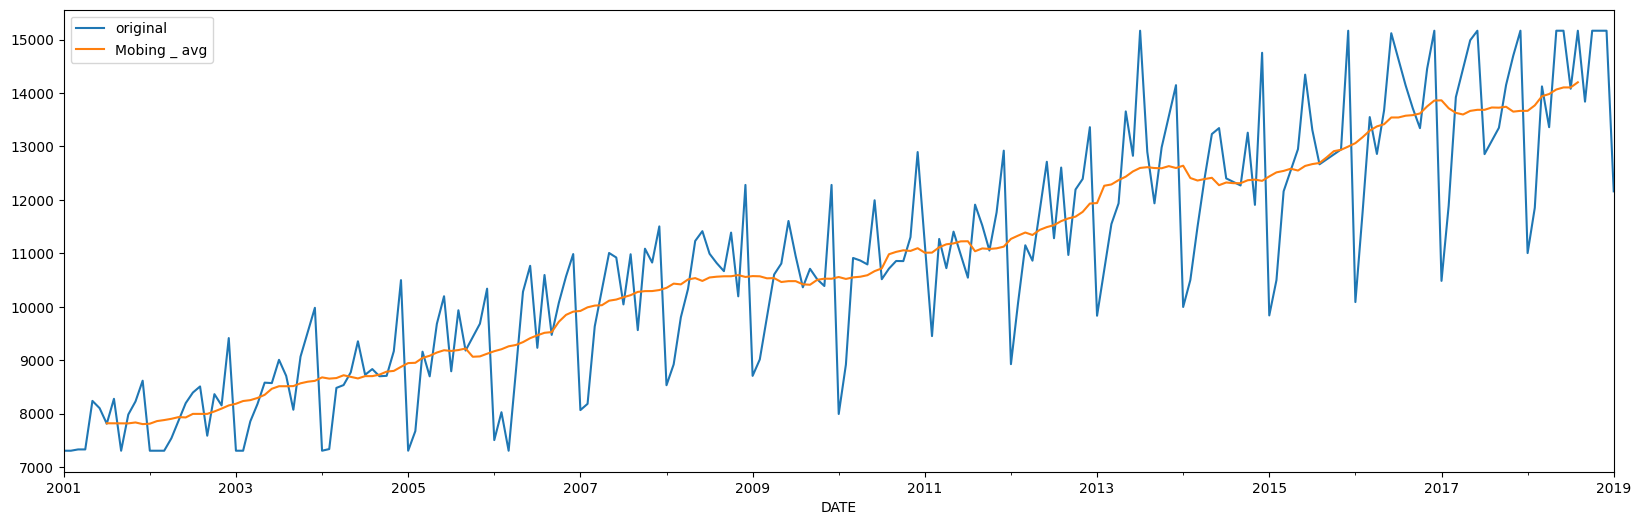

In [ ]:
mobile_sales.Sales.plot(label = "original")
mobile_sales.Sales.rolling(12,center=True).mean().plot(label="Mobing _ avg")
plt.legend()

## Time series decomposition

In [ ]:
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(mobile_sales.Sales,model="additive")

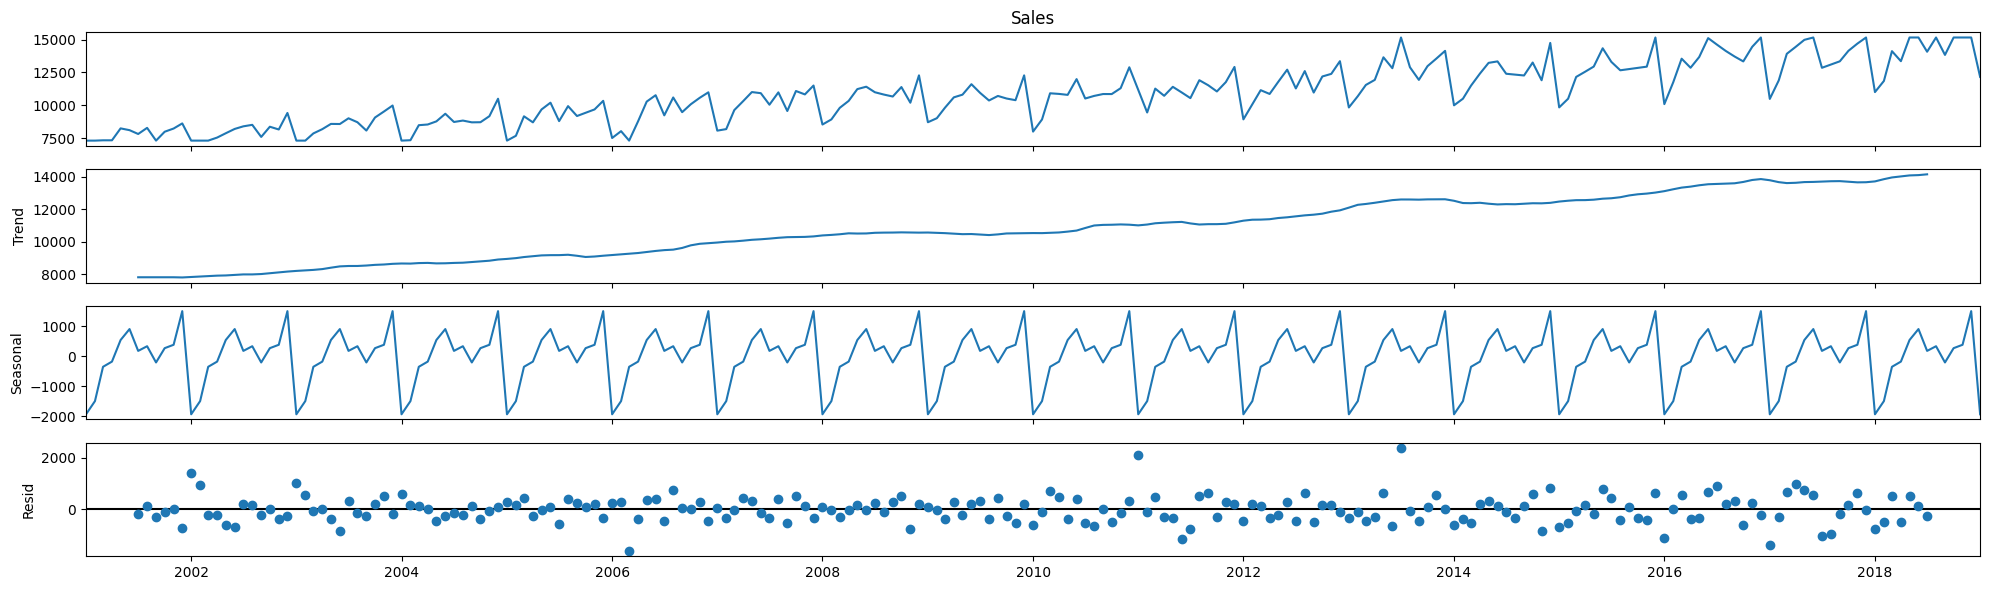

In [ ]:
model.plot();

<Axes: xlabel='DATE'>

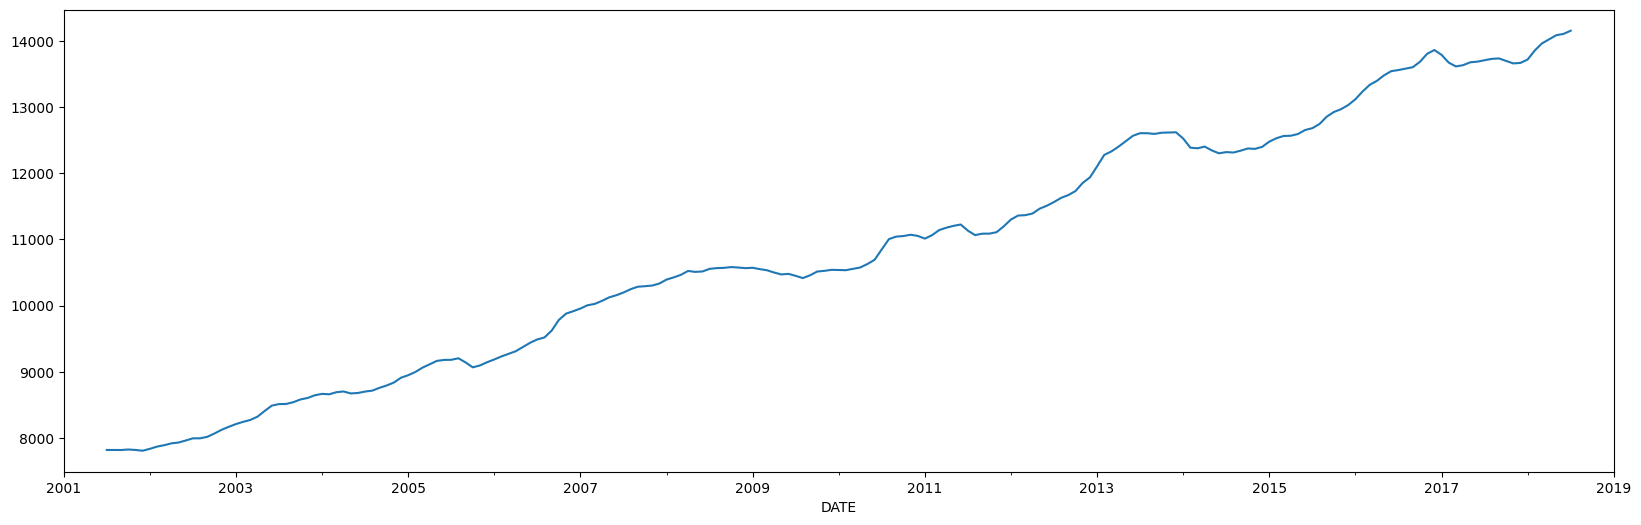

In [ ]:
model.trend.plot()

<Axes: xlabel='DATE'>

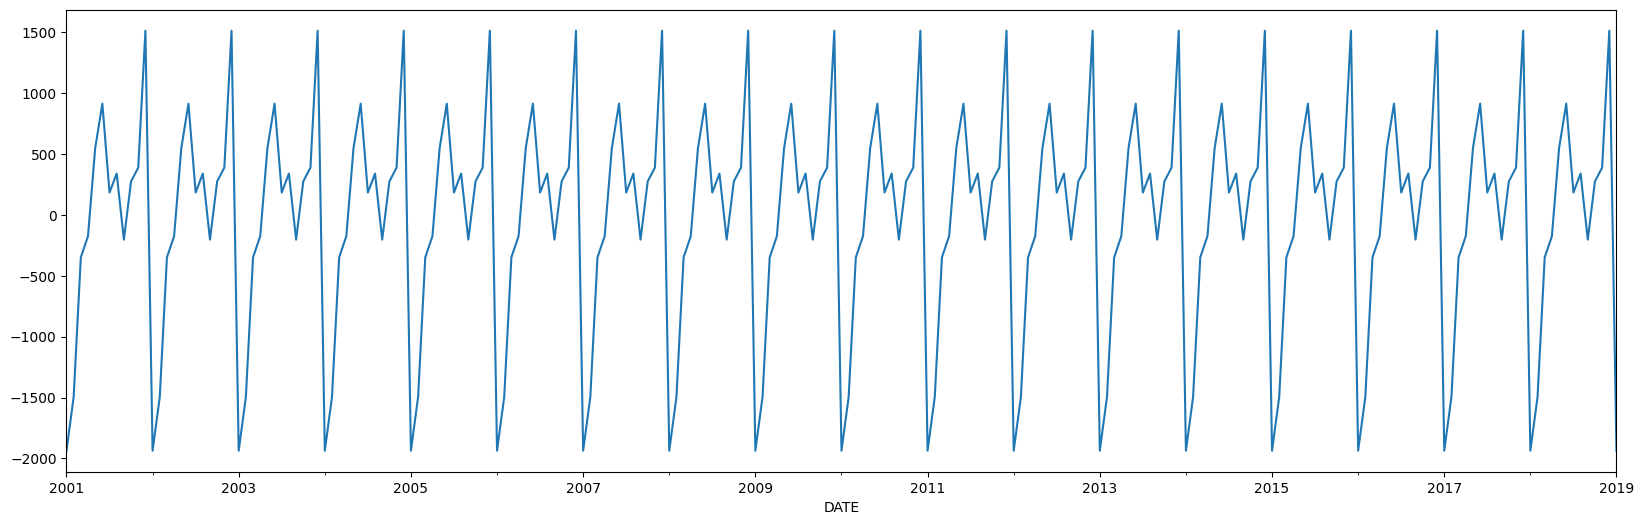

In [ ]:
model.seasonal.plot()

## Generating Forecast

In [ ]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index<train_max_date].copy()
test_x = mobile_sales.loc[mobile_sales.index>=train_max_date].copy()

In [ ]:
test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15164.6
2018-06-01,15164.6
2018-07-01,14080.0
2018-08-01,15164.6
2018-09-01,13838.0
2018-10-01,15164.6


In [ ]:
from sklearn.metrics import(
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

def performance(actual,predicted):
  print("MAE : ",round(mae(actual,predicted),2))
  print("RMSE : ",round(mse(actual,predicted)**0.5,3))
  print("MAPE : ",round(mape(actual,predicted),3)*100)

## Seasonal Navie Method

MAE :  660.37
RMSE :  905.569
MAPE :  4.7


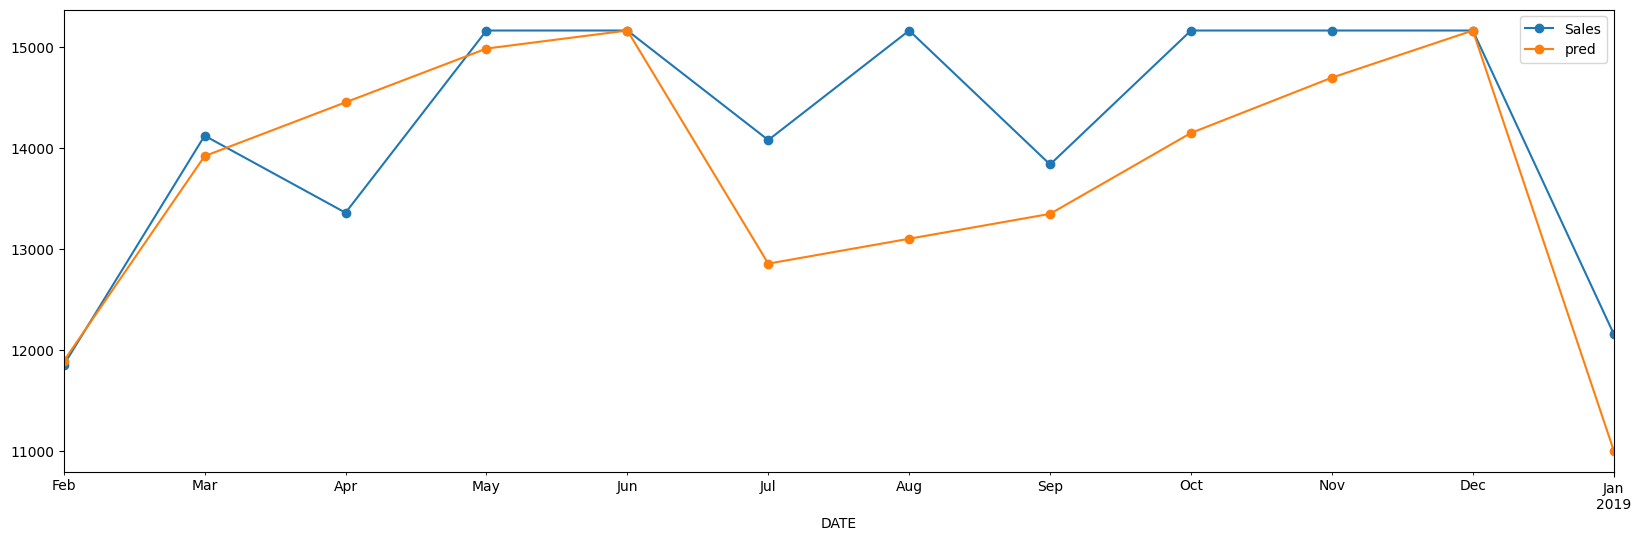

In [ ]:
for i in test_x.index:
  test_x.loc[i,"pred"] = train_x.loc[i-pd.DateOffset(years=1),"Sales"]
test_x.plot(style="-o")
performance(test_x.Sales,test_x.pred)

In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11891.0
2018-03-01,14123.0,13921.0
2018-04-01,13360.0,14453.5
2018-05-01,15164.6,14986.0
2018-06-01,15164.6,15164.6
2018-07-01,14080.0,12856.0
2018-08-01,15164.6,13102.5
2018-09-01,13838.0,13349.0
2018-10-01,15164.6,14150.0


## Triple Exponential Smoothing

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE :  533.07
RMSE :  627.834
MAPE :  3.6999999999999997


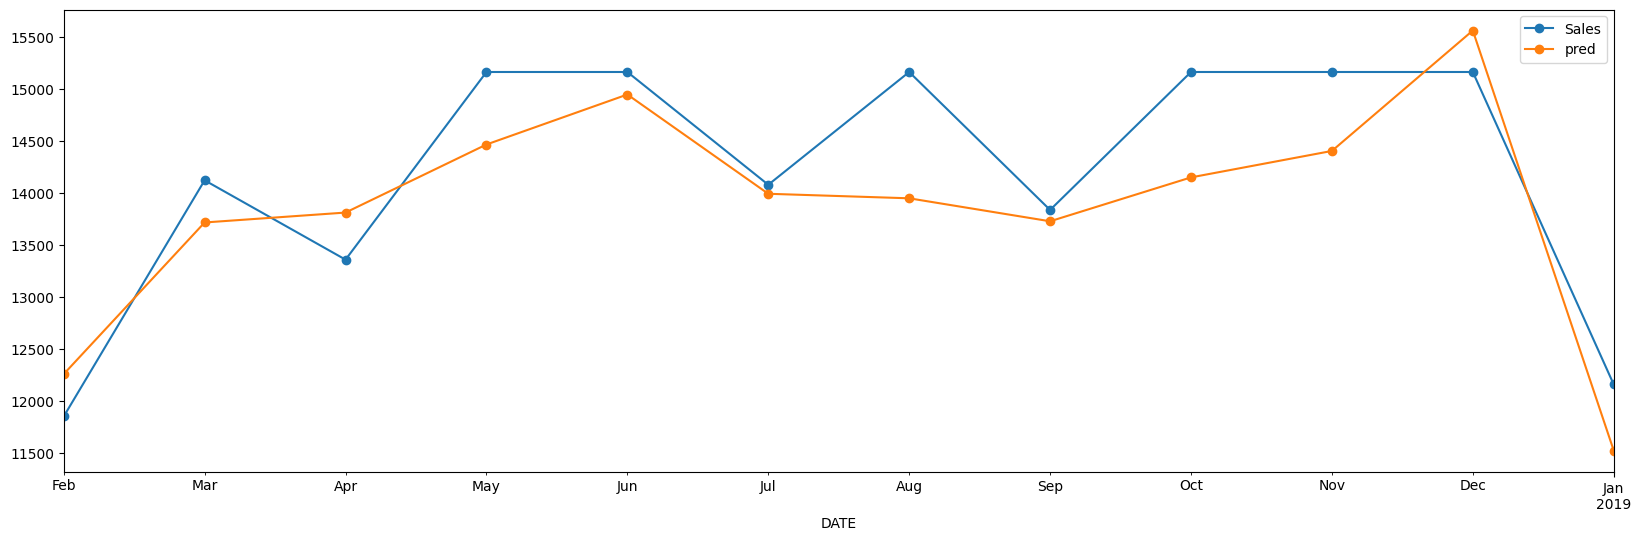

In [ ]:
import statsmodels.api as sm
model = sm.tsa.ExponentialSmoothing(train_x.Sales,trend= "add",seasonal="add",seasonal_periods=12).fit(smoothing_level=0.4)
test_x["pred"] = model.forecast(len(test_x))
test_x.plot(style="-o")
performance(test_x["Sales"],test_x["pred"])

## Dickey - Fuller Test

In [ ]:
def adf_test(dataset):
  p_value = sm.tsa.stattools.adfuller(dataset)[1]
  if p_value <= 0.05:
    print("The series is in Stationary")
  else:
    print("The series is not in Stationsry")

In [ ]:
adf_test(mobile_sales)

The series is not in Stationsry


In [ ]:
detrend = mobile_sales.Sales.diff()
adf_test(detrend.dropna())

The series is in Stationary


## Auto Coorelation

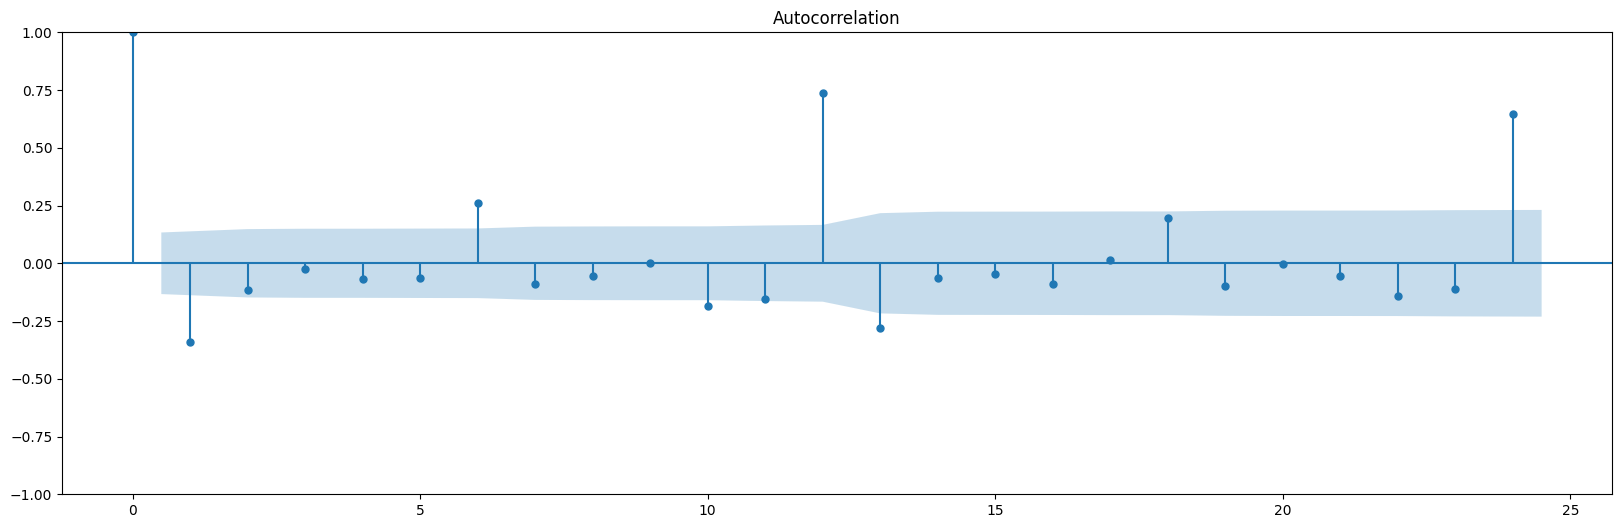

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(mobile_sales.Sales.diff().dropna());

## SARIMA

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optim

MAE :  418.41
RMSE :  501.957
MAPE :  3.0


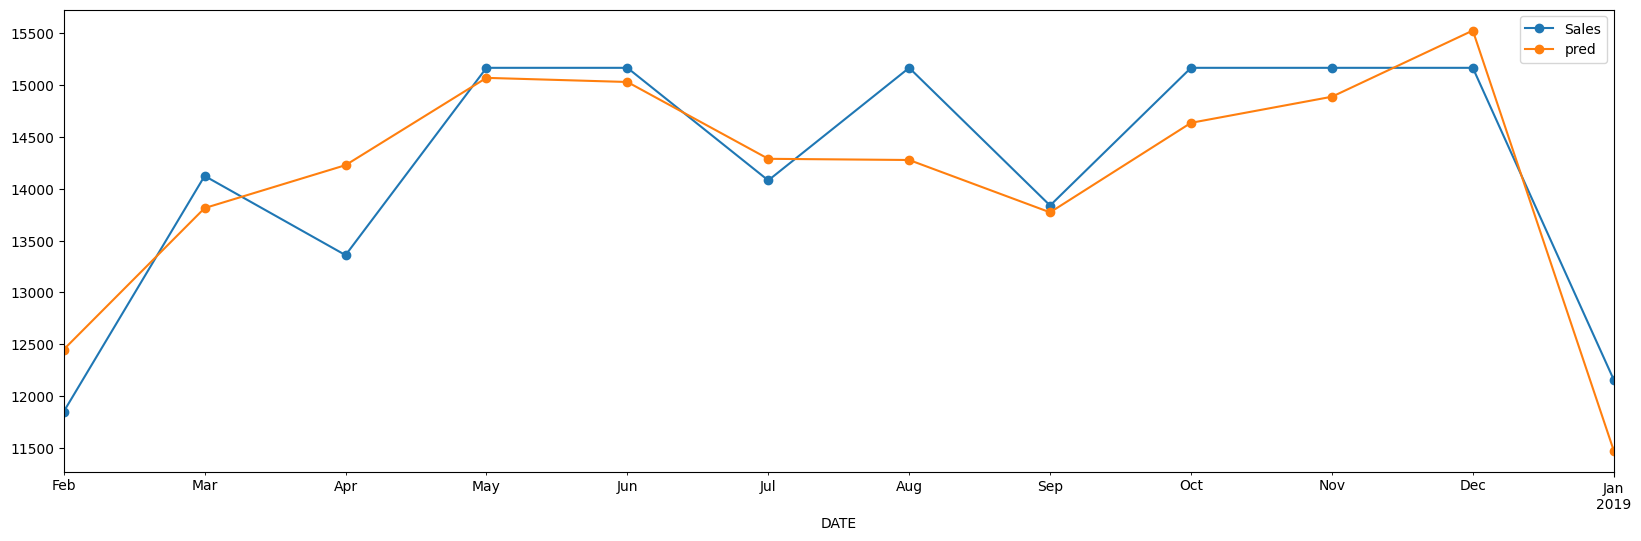

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train_x.Sales,order=(6,1,5),seasonal_order=(1,1,2,12))
sarima_model = sarima_model.fit()

test_x["pred"] = sarima_model.forecast(len(test_x))
test_x.plot(style="-o")
performance(test_x["Sales"],test_x["pred"])

In [ ]:
df = pd.DataFrame(index=pd.date_range(start=mobile_sales.index[-1], periods=13, freq='MS')[1:])

In [ ]:
final_model = SARIMAX(mobile_sales.Sales,order=(6,1,5),seasonal_order=(1,1,2,12))
final_model = final_model.fit()
df["pred"] = final_model.forecast(len(df))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
df

,pred
2019-02-01,12646.611149
2019-03-01,14359.046581
2019-04-01,14194.868401
2019-05-01,15474.415510
2019-06-01,15484.728399
2019-07-01,14778.461619
2019-08-01,14997.316767
2019-09-01,14159.422651
2019-10-01,15225.830107
2019-11-01,15301.743237
